<a href="https://colab.research.google.com/github/vishytheswishy/breast-cancer-diagnosis/blob/master/breastcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix



%matplotlib inline


Import all required libraries for data visualization and the dataset.

In [0]:
cancer = load_breast_cancer() #for visualization and graphics
cancer_dataset_vis, y_val =  load_breast_cancer(return_X_y=True)
print("cancer.keys(): {}".format(cancer.keys()))

print("Sample counts per class:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))


cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Sample counts per class:
{'malignant': 212, 'benign': 357}


now lets look at the data and create the labels for the dataset.
(taken from Professor Xie's github directory provided to us during instruction).

In [0]:
df = pd.DataFrame(cancer_dataset_vis,y_val, )
try:
  nl_info = df[df.isnull().any(axis = 1)].count()
  nulltotal = int(nl_info.sum())
  print(nulltotal,"null values where found")
except TypeError:
  print("null values unable to be ided")

0 null values where found


Now we clean the data and do some postprocessing, since the dataset is well established we will not have a lot of null values


In [0]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.67909,-0.0973174,0.674172,0.735864,-0.2226,0.206,0.194204,0.376169,-0.104321,-0.0426413,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.00706589
1,0.323782,1,0.329533,0.321086,-0.0233885,0.236702,0.302418,0.293464,0.071401,-0.0764372,0.275869,0.386358,0.281673,0.259845,0.00661378,0.191975,0.143293,0.163851,0.00912717,0.0544575,0.352573,0.912045,0.35804,0.343546,0.0775034,0.27783,0.301025,0.295316,0.105008,0.119205
2,0.997855,0.329533,1,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.0867611,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.0816293,-0.00552339,0.969476,0.303038,0.970387,0.94155,0.150549,0.455774,0.563879,0.771241,0.189115,0.0510185
3,0.987357,0.321086,0.986507,1,0.177028,0.498502,0.685983,0.823269,0.151293,-0.28311,0.732562,-0.0662802,0.726628,0.800086,-0.166777,0.212583,0.20766,0.37232,-0.0724966,-0.019887,0.962746,0.287489,0.95912,0.959213,0.123523,0.39041,0.512606,0.722017,0.14357,0.0037376
4,0.170581,-0.0233885,0.207278,0.177028,1,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.0684064,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.21312,0.0360718,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
5,0.506124,0.236702,0.556936,0.498502,0.659123,1,0.883121,0.831135,0.602641,0.565369,0.497473,0.0462048,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.59021,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
6,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1,0.921391,0.500667,0.336783,0.631925,0.0762183,0.660391,0.617427,0.0985637,0.670279,0.69127,0.68326,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.51493
7,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1,0.462497,0.166917,0.69805,0.0214796,0.71065,0.690299,0.0276533,0.490424,0.439167,0.615634,0.0953508,0.257584,0.830318,0.292752,0.855923,0.80963,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
8,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1,0.479921,0.303379,0.128053,0.313893,0.22397,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.0906507,0.219169,0.177193,0.426675,0.4732,0.433721,0.430297,0.699826,0.438413
9,-0.311631,-0.0764372,-0.261477,-0.28311,0.584792,0.565369,0.336783,0.166917,0.479921,1,0.000110995,0.164174,0.0398299,-0.0901702,0.401964,0.559837,0.44663,0.341198,0.345007,0.688132,-0.253691,-0.0512692,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Now that we have calculated our correlation matrix its clear to see that anything highlighted in red has an incredibly high correlation in regards to testing positve for breast cancer! Features within the red should be eliminated to prune data and pursue a more effecient model!

In [0]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, test_size = 0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(364, 30)
(114, 30)
(114,)
(364,)


split the training data into partitions

https://scikit-learn.org/stable/modules/svm.html 

In [0]:
from sklearn.svm import SVC 
svc_model = SVC(kernel= 'linear')
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_predictions = svc_model.predict(X_test)

calculate the predictions

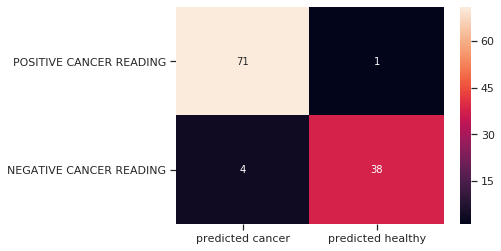

In [0]:
cf = np.array(confusion_matrix(y_test, y_predictions, labels= [1,0]))
confus  = pd.DataFrame(cf, index= ['POSITIVE CANCER READING','NEGATIVE CANCER READING'], columns= ['predicted cancer', 'predicted healthy'])
sns.heatmap(confus, annot = True)

In [0]:
print(classification_report(y_test,y_predictions))
y_valpredictions = svc_model.predict(X_val)
print("VALIDATION DATASET CLASSIFICATION REPORT: SVM")
print(classification_report(y_val,y_valpredictions))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

VALIDATION DATASET CLASSIFICATION REPORT: SVM
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        34
           1       0.95      1.00      0.97        57

    accuracy                           0.97        91
   macro avg       0.97      0.96      0.96        91
weighted avg       0.97      0.97      0.97        91



why such low accuracy, lets try and normalize the data

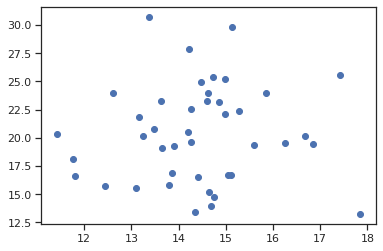

In [0]:
plt.scatter(svc_model.support_vectors_[:,0],svc_model.support_vectors_[:,1])

In [0]:
x_train_min = X_train.min()
x_train_max = X_train.max()
x_train_range = (x_train_max - x_train_min)
x_train_scaling = (X_train - x_train_min)/x_train_range

NORMALIZE THE TRAINING DATA

In [0]:
x_test_min = X_test.min()
x_test_range = (X_test- x_test_min).max()
x_test_scaling = (X_test - x_test_min) /x_test_range

NORMALIZE THE TEST DATA

In [0]:
x_val_min = X_val.min()
x_val_range = (X_val- x_val_min).max()
x_val_scaling = (X_val - x_val_min) /x_test_range

NORMALIZE THE VALIDATION DATA

In [0]:
from sklearn.svm import SVC 
svc_model = SVC(kernel= 'linear')
svc_model.fit(x_train_scaling,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

FIT THE DATA

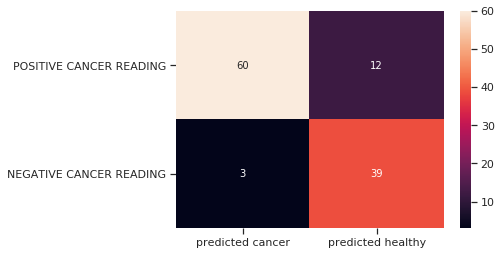

In [0]:
y_predictions = svc_model.predict(x_test_scaling)
cf = np.array(confusion_matrix(y_test, y_predictions, labels= [1,0]))
confus  = pd.DataFrame(cf, index= ['POSITIVE CANCER READING','NEGATIVE CANCER READING'], columns= ['predicted cancer', 'predicted healthy'])
sns.heatmap(confus,annot=True)

CALCULATE PREDICTED Y

In [0]:
svc_results = classification_report(y_test,y_predictions)
print(svc_results)
y_valpredictions = svc_model.predict(X_val)
print("VALIDATION DATASET CLASSIFICATION REPORT: SVM SCALED DATA")
print(classification_report(y_val,y_valpredictions))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        42
           1       0.95      0.83      0.89        72

    accuracy                           0.87       114
   macro avg       0.86      0.88      0.86       114
weighted avg       0.88      0.87      0.87       114

VALIDATION DATASET CLASSIFICATION REPORT: SVM SCALED DATA
              precision    recall  f1-score   support

           0       0.37      1.00      0.54        34
           1       0.00      0.00      0.00        57

    accuracy                           0.37        91
   macro avg       0.19      0.50      0.27        91
weighted avg       0.14      0.37      0.20        91



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


RANDOM FOREST MODEL IMPLEMENTATION


In [0]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=50, oob_score=True, n_jobs=1)
rfm.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

fit the model

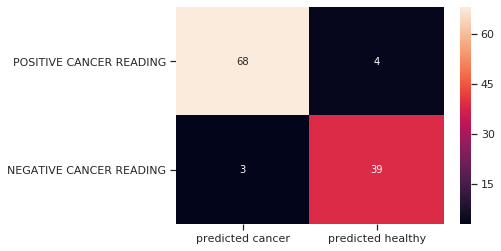

In [0]:
result = rfm.predict(X_test)
cf = np.array(confusion_matrix(y_test, result, labels= [1,0]))
confus  = pd.DataFrame(cf, index= ['POSITIVE CANCER READING','NEGATIVE CANCER READING'], columns= ['predicted cancer', 'predicted healthy'])
sns.heatmap(confus,annot=True)

In [0]:

randomforestrees = classification_report(result,y_test)
print(randomforestrees)
y_valpredictions = rfm.predict(X_val)
print("VALIDATION DATASET CLASSIFICATION REPORT: RFM VALIDATION")
print(classification_report(y_val,y_valpredictions))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

VALIDATION DATASET CLASSIFICATION REPORT: RFM VALIDATION
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        34
           1       0.97      0.98      0.97        57

    accuracy                           0.97        91
   macro avg       0.97      0.96      0.96        91
weighted avg       0.97      0.97      0.97        91



accuracy is 95% on the test set and 95% on the validation set, thats pretty good!

GAUSSIAN NAIVE BAYES IMPLEMENTATION

In [0]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

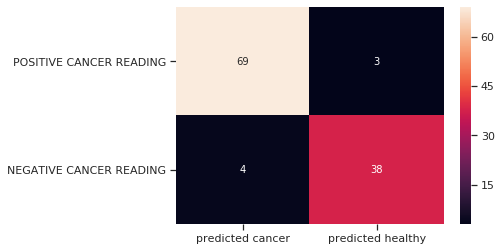

In [0]:
result = gb.predict(X_test)
cf = np.array(confusion_matrix(y_test, result, labels= [1,0]))
confus  = pd.DataFrame(cf, index= ['POSITIVE CANCER READING','NEGATIVE CANCER READING'], columns= ['predicted cancer', 'predicted healthy'])
sns.heatmap(confus,annot = True)

gaussian confusion matrix

In [0]:
gbresults = classification_report(result,y_test)
print(gbresults)
y_valpredictions = gb.predict(X_val)
print("VALIDATION DATASET CLASSIFICATION REPORT: G NAIVE BAYES")
print(classification_report(y_val,y_valpredictions))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        41
           1       0.96      0.95      0.95        73

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

VALIDATION DATASET CLASSIFICATION REPORT: G NAIVE BAYES
              precision    recall  f1-score   support

           0       0.97      0.85      0.91        34
           1       0.92      0.98      0.95        57

    accuracy                           0.93        91
   macro avg       0.94      0.92      0.93        91
weighted avg       0.94      0.93      0.93        91



LOGISTIC REGRESSION IMPLEMENTATION

In [0]:
from sklearn.linear_model import LogisticRegression

#split data 60/20/20
X, y =  load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=0)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=0)

log_classifier = LogisticRegression(C=1.4, tol=1e-6, random_state=0, solver='newton-cg')

#fit model based on training model
print(log_classifier.fit(x_train, y_train))
print("Logistic Regression test data score: ", log_classifier.score(x_test, y_test))

#use model to make predictions on test data
log_testpredictions = log_classifier.predict(x_test)

LogisticRegression(C=1.4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=1e-06, verbose=0,
                   warm_start=False)
Logistic Regression test data score:  0.9736842105263158


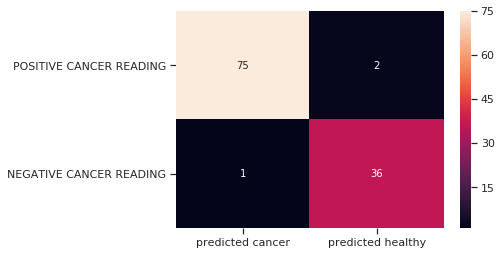

In [0]:
cf = np.array(confusion_matrix(y_test, log_testpredictions, labels= [1,0]))
confus = pd.DataFrame(cf, index= ['POSITIVE CANCER READING','NEGATIVE CANCER READING'], columns= ['predicted cancer', 'predicted healthy'])
sns.heatmap(confus, annot = True)

In [0]:
#print accuracy results
print(classification_report(y_test,log_testpredictions))
log_valpredictions = log_classifier.predict(x_val)
print("VALIDATION DATASET CLASSIFICATION REPORT: Logistic Regression")
print(classification_report(y_val,log_valpredictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.99      0.97      0.98        77

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

VALIDATION DATASET CLASSIFICATION REPORT: Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.98      0.96      0.97        68

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



About a 97% accuracy rate, close to Linear SVM.

CLUSTERING METHOD

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')


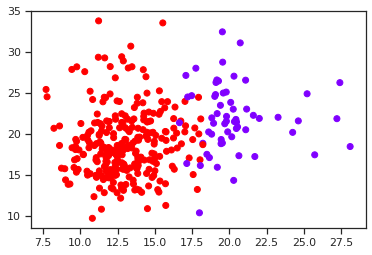

In [0]:
from sklearn.cluster import AgglomerativeClustering

cluster_classifier = AgglomerativeClustering(n_clusters=2)
print(cluster_classifier)
cluster_labels = cluster_classifier.fit_predict(x_train)

#visualize clustering of two features
plt.scatter(x_train[:,0],x_train[:,1], c=cluster_labels, cmap='rainbow')

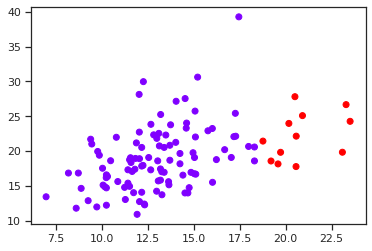

In [0]:
#use test data
cluster_testpredictions = cluster_classifier.fit_predict(x_test)
plt.scatter(x_test[:,0],x_test[:,1], c=cluster_testpredictions, cmap='rainbow')

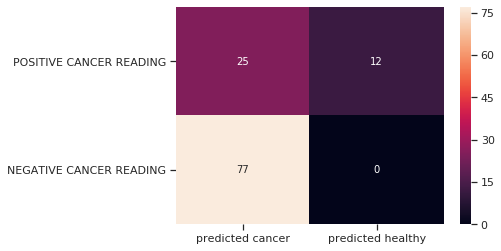

In [0]:
cf = np.array(confusion_matrix(y_test, cluster_testpredictions))
confus = pd.DataFrame(cf, index= ['POSITIVE CANCER READING','NEGATIVE CANCER READING'], columns= ['predicted cancer', 'predicted healthy'])
sns.heatmap(confus, annot = True)

In [0]:
print(classification_report(y_test,cluster_testpredictions))
cluster_valpredictions = cluster_classifier.fit_predict(x_val)
print("VALIDATION DATASET CLASSIFICATION REPORT: Cluster Method")
print(classification_report(y_val,cluster_valpredictions))

              precision    recall  f1-score   support

           0       0.25      0.68      0.36        37
           1       0.00      0.00      0.00        77

    accuracy                           0.22       114
   macro avg       0.12      0.34      0.18       114
weighted avg       0.08      0.22      0.12       114

VALIDATION DATASET CLASSIFICATION REPORT: Cluster Method
              precision    recall  f1-score   support

           0       0.97      0.74      0.84        46
           1       0.85      0.99      0.91        68

    accuracy                           0.89       114
   macro avg       0.91      0.86      0.88       114
weighted avg       0.90      0.89      0.88       114



The agglomerative cluster classifier is not reliable, as seen above, it cannot predict accurate results consistently for the test and validation data sets.

STACKING CLASSIFIERS

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
estimators = [
        ('rf', rfm),
        ('svr', make_pipeline(StandardScaler(), svc_model))
    ]
stacked_classifier = StackingClassifier(estimators=estimators, final_estimator=log_classifier)
from sklearn.model_selection import train_test_split

stacked_classifier.fit(x_train, y_train).score(x_test, y_test)

ImportError: ignored

###GAUSSIAN NAIVE BAYES CLASSIFIER ~ 94% | 93% test/val Accuracy
###RANDOM FOREST MODEL -- 95% | 95% test/val Accuracy
###LINEAR SVM ~ 96% | 97% test/val Accuracy
###LINEAR REGRESSION ~95% | 96% test/val Accuracy
###CLUSTERING MODEL ~19% | 85% test/val Acccuracy
### After normalizing the data ~ 87% |37% test&val Accuracy

save to g drive